In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
s_train = pd.read_csv('datasets/clean_train.csv')
s_test = pd.read_csv('datasets/clean_test.csv')

In [3]:
lot_train_feat = pd.DataFrame(s_train[['lot_frontage', 'lot_area', 'lot_config', 'lot_shape']])
lot_test_feat = pd.DataFrame(s_train[['lot_frontage', 'lot_area', 'lot_config', 'lot_shape']])

In [4]:
type(lot_train_feat)

pandas.core.frame.DataFrame

In [5]:
#Trying out a very small model first. 
features = ['lot_frontage', 'lot_area', 'lot_config', 'lot_shape']
X = s_train[features]
y = s_train['saleprice']
X_test_data = s_test[features]
print(X.describe())
print(y.describe())

       lot_frontage       lot_area   lot_config    lot_shape
count   1986.000000    1986.000000  1986.000000  1986.000000
mean      56.965760    9839.862538     1.399295     1.396777
std       32.376685    6411.856658     0.772434     0.560379
min        0.000000    1300.000000     1.000000     1.000000
25%       43.000000    7442.250000     1.000000     1.000000
50%       63.000000    9316.000000     1.000000     1.000000
75%       78.000000   11268.750000     2.000000     2.000000
max      313.000000  159000.000000     5.000000     4.000000
count      1986.000000
mean     175450.263847
std       65798.980319
min       50138.000000
25%      129500.000000
50%      160000.000000
75%      210000.000000
max      398800.000000
Name: saleprice, dtype: float64


In [6]:
X.isnull().sum()

lot_frontage    0
lot_area        0
lot_config      0
lot_shape       0
dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=76)

In [8]:
# plt.figure(figsize=(15,15))
# sns.heatmap(s_train.corr(), annot=True)

In [9]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [10]:
X_scaled.shape

(1588, 4)

In [11]:
type(X_scaled)

numpy.ndarray

In [12]:
X_test_scaled.shape

(398, 4)

In [13]:
X_train.corr(),s_train['saleprice'].sort_values()

(              lot_frontage  lot_area  lot_config  lot_shape
 lot_frontage      1.000000  0.112543   -0.113391  -0.213045
 lot_area          0.112543  1.000000    0.174859   0.291666
 lot_config       -0.113391  0.174859    1.000000   0.274945
 lot_shape        -0.213045  0.291666    0.274945   1.000000,
 398      50138
 1947     51689
 1332     52000
 1890     52500
 679      55000
          ...  
 1700    392500
 1980    394617
 1713    395000
 1760    395039
 1674    398800
 Name: saleprice, Length: 1986, dtype: int64)

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
lr_scores = cross_val_score(lr, X_scaled, y_train, cv=3)
lr_scores.mean()

0.14421668475994587

In [17]:
lasso = LassoCV(n_alphas=30)

In [18]:
lasso.fit(X_scaled, y_train)

LassoCV(n_alphas=30)

In [19]:
lasso.alpha_

887.5702305772396

In [20]:
np.shape(lasso.coef_)

(4,)

In [21]:
lasso_scores = cross_val_score(lasso, X_test_scaled, y_test, cv=3)
lasso_scores.mean()

-0.10576961371052578

### Testing with Ridge Model ###

In [22]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [23]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.14417131483404108

In [24]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [25]:
ridge.score(X_train, y_train)

0.1483435312275807

In [26]:
ridge.score(X_test, y_test)

0.17154868244105592

In [27]:
ridge_scores.mean()

0.14417131483404108

In [28]:
pred = ridge.predict(X_test)
pred[:10]

array([161750.57904799, 159633.25028019, 203483.31633074, 133582.18278756,
       199442.82392007, 206909.77815766, 168562.35236074, 167417.47439777,
       171714.05715307, 168579.97795609])

In [29]:
residuals = y_test - pred

In [30]:
residuals

1838     12249.420952
179      16366.749720
122     -53483.316331
1179     -9582.182788
1140    -13542.823920
            ...      
1842     56986.281724
719     -57766.720593
17      -28466.630700
263     144842.021057
274     167936.822817
Name: saleprice, Length: 398, dtype: float64

In [31]:
pred[:10]

array([161750.57904799, 159633.25028019, 203483.31633074, 133582.18278756,
       199442.82392007, 206909.77815766, 168562.35236074, 167417.47439777,
       171714.05715307, 168579.97795609])

In [32]:
r2_score(y_test, pred)

0.17154868244105592

<AxesSubplot:>

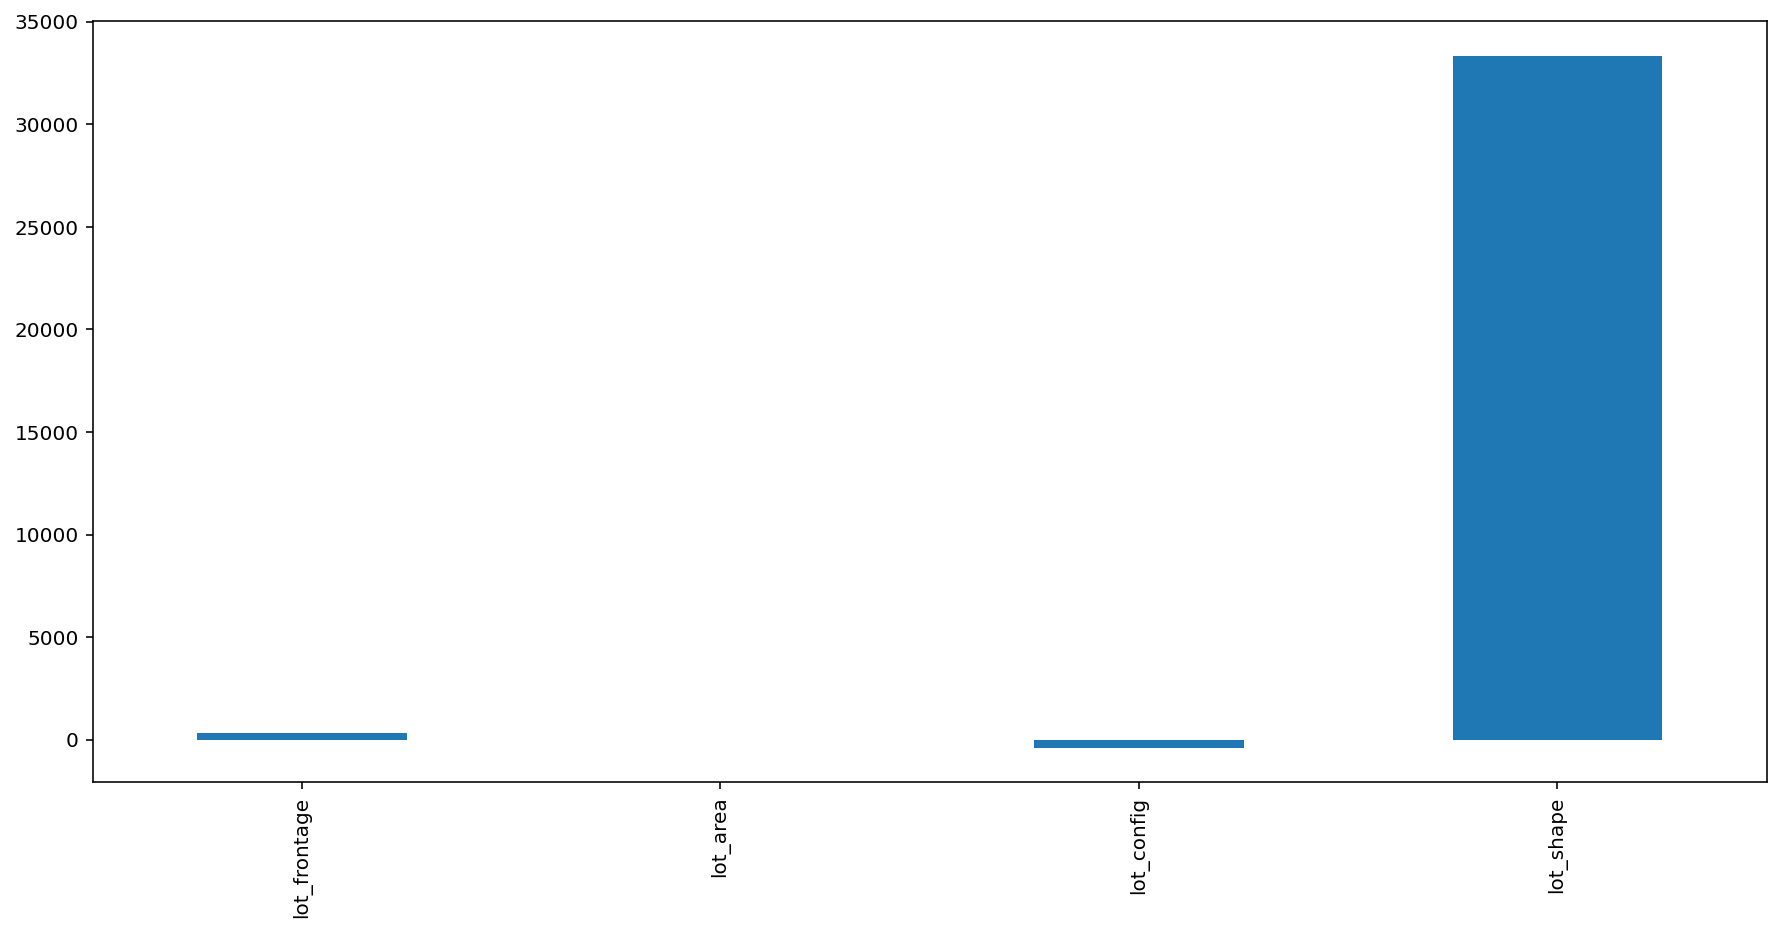

In [33]:
pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7))

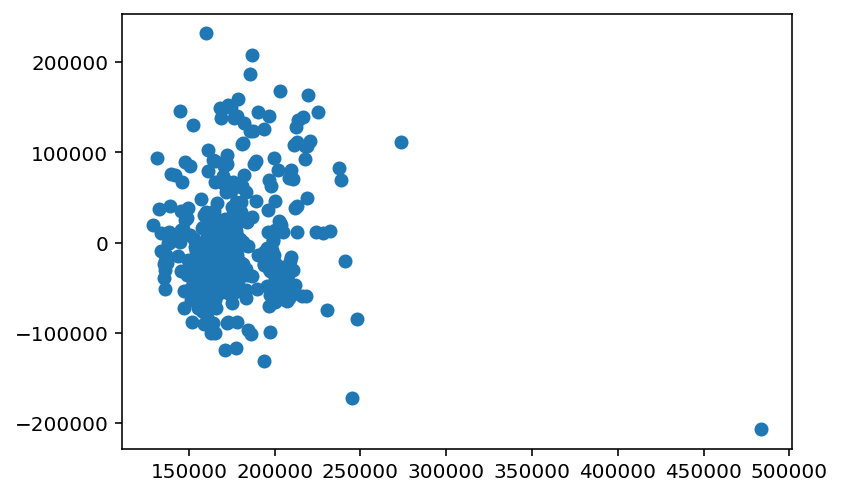

In [34]:
plt.scatter(pred, residuals)

In [35]:
ridge_df = pd.DataFrame([ridge.coef_, features], index = ['Coefficients', 'Features']).T
ridge_df = ridge_df.set_index('Features')
ridge_df['Coefficients'] = np.abs(ridge_df['Coefficients'])
ridge_df = ridge_df.sort_values(by='Coefficients',ascending=False)
ridge_df.head(10)

,Coefficients
Features,
lot_shape,33328
lot_config,400.052
lot_frontage,323.129
lot_area,1.8367


Text(0.5, 0, 'Strenth of Predictor')

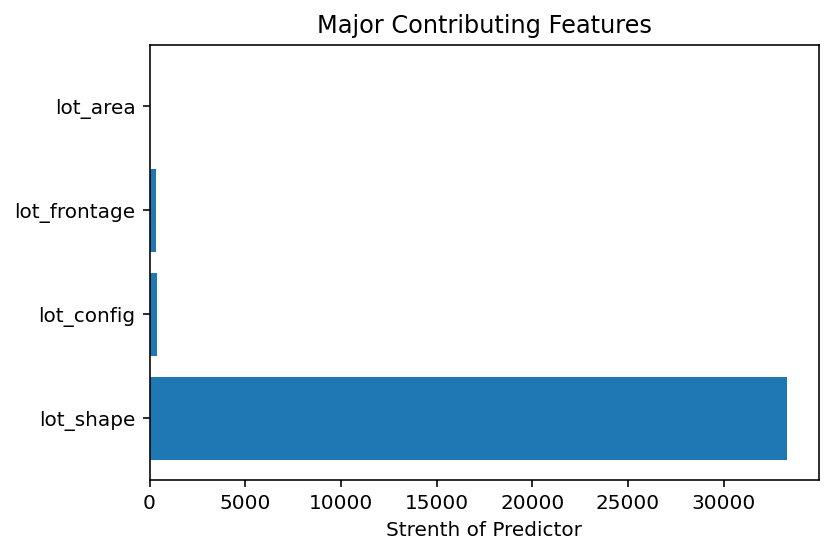

In [36]:
plt.barh(y=ridge_df.index[:10], width=ridge_df['Coefficients'][0:10]);
plt.title('Major Contributing Features')
plt.xlabel('Strenth of Predictor')

In [37]:
pred = ridge.predict(X_test)
residuals = y_test - pred
residuals[:5]  #look at the first fiveID

1838    12249.420952
179     16366.749720
122    -53483.316331
1179    -9582.182788
1140   -13542.823920
Name: saleprice, dtype: float64

Text(0.5, 1.0, 'Distribution of Residuals')

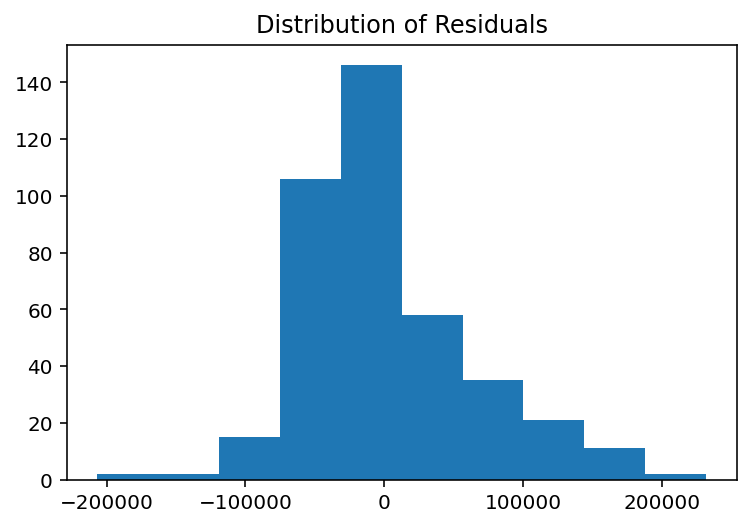

In [38]:
plt.hist(residuals);
plt.title('Distribution of Residuals')

In [39]:
sample_prices = y_test.values[0]
np.log(sample_prices)

12.066810578196666

Text(0.5, 1.0, 'Transformed Residuals')

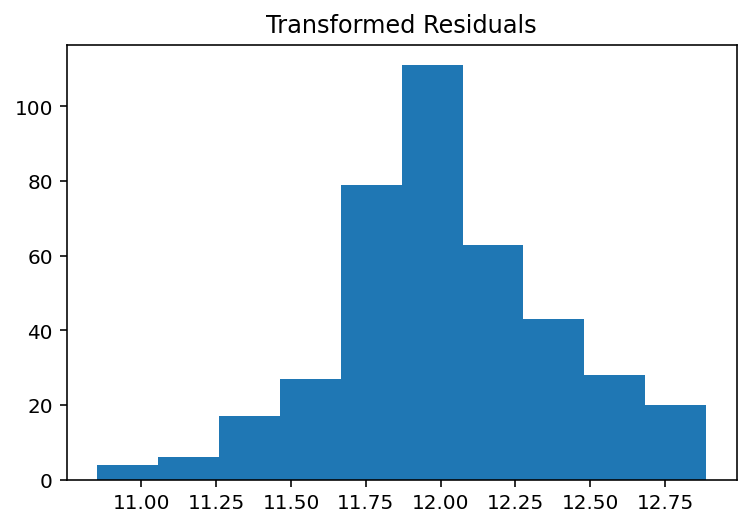

In [40]:
plt.hist(np.log(y_test));
plt.title('Transformed Residuals')

Text(0.5, 1.0, 'Comparing Predicted Prices with Residuals')

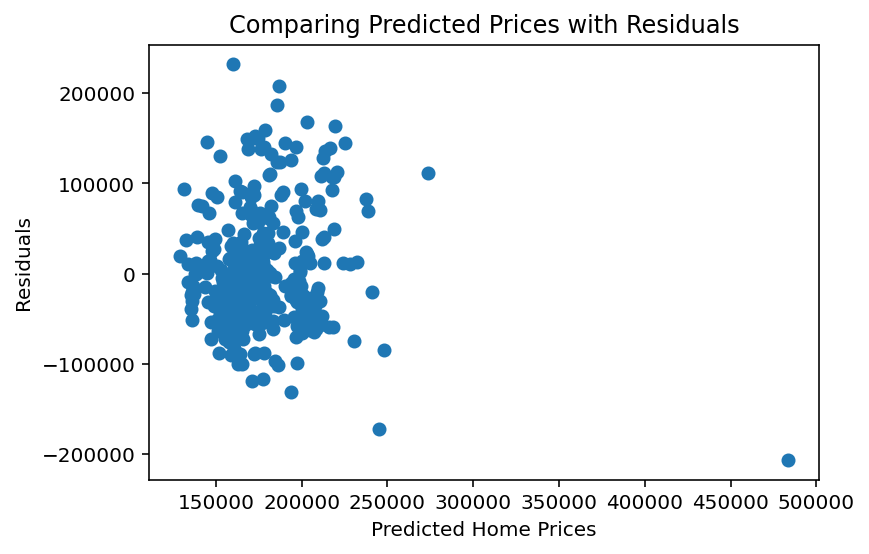

In [41]:
#interdcept 182000
#slope for quality is 19500
plt.scatter(x=pred,y=residuals)
plt.xlabel('Predicted Home Prices')
plt.ylabel('Residuals')
plt.title('Comparing Predicted Prices with Residuals')

# Now with Test data #

In [42]:
s_test.shape

(878, 81)

In [43]:
X_test_data.head()

,lot_frontage,lot_area,lot_config,lot_shape
0,69.0,9142,1,1
1,0.0,9662,1,2
2,58.0,17104,1,2
3,60.0,8520,1,1
4,0.0,9500,1,2


In [44]:
X_test_data.corr(),s_train['saleprice'].sort_values()

(              lot_frontage  lot_area  lot_config  lot_shape
 lot_frontage      1.000000  0.138744   -0.171240  -0.116746
 lot_area          0.138744  1.000000    0.067606   0.269882
 lot_config       -0.171240  0.067606    1.000000   0.292780
 lot_shape        -0.116746  0.269882    0.292780   1.000000,
 398      50138
 1947     51689
 1332     52000
 1890     52500
 679      55000
          ...  
 1700    392500
 1980    394617
 1713    395000
 1760    395039
 1674    398800
 Name: saleprice, Length: 1986, dtype: int64)

In [45]:
test_pred = ridge.predict(X_test_data)

In [46]:
test_pred[:10]

array([164911.02555109, 176898.14981874, 209308.4126647 , 160860.43057438,
       176600.60361369, 136081.03052235, 158268.04865607, 175407.4441684 ,
       144882.00506912, 168655.28285984])

In [47]:
s_test['saleprice'] = test_pred

In [48]:
s_test.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,1,...,0,0,NaN,NaN,NaN,0,4,2006,WD,164911.025551
1,1,2718,905108090,90,RL,0.0,9662,Pave,NaN,2,...,0,0,NaN,NaN,NaN,0,8,2006,WD,176898.149819
2,2,2414,528218130,60,RL,58.0,17104,Pave,NaN,2,...,0,0,NaN,NaN,NaN,0,9,2006,New,209308.412665
3,3,1989,902207150,30,RM,60.0,8520,Pave,NaN,1,...,0,0,NaN,NaN,NaN,0,7,2007,WD,160860.430574
4,4,625,535105100,20,RL,0.0,9500,Pave,NaN,2,...,185,0,NaN,NaN,NaN,0,7,2009,WD,176600.603614


In [49]:
y_test_data = s_test['saleprice']

In [50]:
# Scale test set
X_td_scaled = sc.transform(X_test_data)
# y_td_scaled = sc.transform(y_test_data)

In [51]:
X_td_scaled.shape

(878, 4)

In [52]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100)).fit(X_td_scaled, y_test_data)
ridge

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [53]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.14417131483404108

In [54]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [55]:
ridge.score(X_train, y_train)

0.1483435312275807

In [56]:
ridge.score(X_test, y_test)

0.17154868244105592

In [57]:
ridge.score(X_td_scaled, y_test_data)

-6.381152384026789

In [58]:
s_test.columns

Index(['Unnamed: 0', 'id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage',
       'lot_area', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_b

In [59]:
s_test.rename(columns={'id': 'ID', 'saleprice': 'SalePrice'}, errors="raise", inplace=True)

In [60]:
submission = s_test[['ID', 'SalePrice']]

In [61]:
submission.to_csv('datasets/submission_2.csv', index=False)